# Aula: modelagem, python e jupyter

**Data:** 11 de março de 2019

**Local:** A204 (terça-feira) e LIG 1 (quinta-feira)

**Professores:** 
- Alejandro Cabrera
    - *gabinete:* C–125A
    - *email:* <alejandro@matematica.ufrj.br>
    - *página:* http://www.dma.im.ufrj.br/~acabrera/
- Ricardo Rosa 
    - *gabinete:* C-113B
    - *email:* <rrosa@im.ufrj.br>
    - *página:* http://www.dma.im.ufrj.br/~rrosa


## O material do curso no github

Disponível no repositório [rmsrosa/modelagem_matematica](https://www.github.com/rmsrosa/modelagem_matematica)

- "Baixar" o repositório inteiro, com todas os "cadernos" Jupyter;
- "Baixar" cada "caderno" individualmente;
- Interagir com os cadernos localmente via `jupyter lab` ou `jupyter notebook`;
- Visualizar os cadernos no próprio github;
- Visualizar e interagir com os cadernos na nuvem:
    - [Binder](https://mybinder.org); ou 
    - [Google Colab](https://colab.research.google.com/notebooks/welcome.ipynb).
- Outras referências:
    - G. Ledder, "Mathematics for the Life Sciences", Springer, 2013. Capítulo 2

## Avaliação

- Listas
- Mini-projetos
- Projeto final

## Modelagem matemática


&#9917; ... Alejandro

## O ambiente Jupyter

Há vários ambientes semelhantes:
- [Jupyter lab](https://jupyterlab.readthedocs.io/en/stable/): Roda localmente e depende do ambiente python instalado na máquina e dos pacotes disponíveis no ambiente
- [Jupyter notebook](https://jupyter.org): semelhante ao jupyter lab
- [Binder](https://mybinder.org): Cria um ambiente customizado a cada vez que é acionado e apenas com os pacotes definidos no arquivo `requirements.txt` do repositório
- [Google Colab](https://colab.research.google.com/notebooks/welcome.ipynb): Já tem o seu ambiente python próprio, com diversos pacotes pré-instalados, e carrega mais rápido do que o binder

### Jupyter instalado localmente

No terminal, em um diretório contendo as notas, execute o comando

```bash
jupyter lab
```

ou 
```bash
jupyter notebook
```

Uma janela, ou aba, se abrirá no navegador, com o ambiente Jupyter.

Se quiser usar um navegador diferente do padrão, basta usar o argumento `--browser`, e.g.:
```bash
jupyter lab --browser chrome
```

### Jupyter na nuvem via binder ou colab

No `README.md` do repositório e em cada "notebook" há um link para abrir a página na nuvem:

&nbsp;
<a href="https://colab.research.google.com/github/rmsrosa/modelagem_matematica/blob/master/notebooks/00.00-Pagina_inicial.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
&nbsp;
<a href="https://mybinder.org/v2/gh/rmsrosa/modelagem_matematica/master?filepath=notebooks/00.00-Pagina_inicial.ipynb"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open and Execute in Binder"></a>
&nbsp;

**Obs:** Se estiver visualizando um caderno jupyter pelo github, clicar com o **botão direito** do *mouse*

## Primeiros passos em Jupyter/Python

### Visão/Revisão

Veja o primeiro capítulo das notas para uma revisão (ou visão) de jupyter e python:

#### [1. Destino, Jupyter!](../notebooks/01.00-Destino_Jupyter.ipynb)

&nbsp;&nbsp;&nbsp;&nbsp; [1.1. O Ambiente computacional](../notebooks/01.01-Ambiente_computacional.ipynb)

&nbsp;&nbsp;&nbsp;&nbsp; [1.2. Reconhecimento de Jupyter](../notebooks/01.02-Reconhecimento_de_Jupyter.ipynb)

&nbsp;&nbsp;&nbsp;&nbsp; [1.3. Gráficos de funções](../notebooks/01.03-Graficos_de_funcoes.ipynb)

&nbsp;&nbsp;&nbsp;&nbsp; [1.4. Arquivos, dados e mais gráficos](../notebooks/01.04-Arquivos_dados_e_mais_graficos.ipynb)

&nbsp;&nbsp;&nbsp;&nbsp; [1.5. Computação simbólica](../notebooks/01.05-Computacao_simbolica.ipynb)

&nbsp;&nbsp;&nbsp;&nbsp; [1.6. Boas práticas em python](../notebooks/01.06-Boas_praticas_em_python.ipynb)



## Exemplos

### Sistemas de equações algébricas

Podemos resolver sistemas de equações algébricas com o pacote `numpy`:
$$ \begin{cases}
  x + y - z = 1, \\
  x - 2y + 3z = 3, \\
  x + z = 2,
\end{cases}
$$

In [1]:
import numpy as np

mat = np.array([[1.0, 1.0, -1.0], [1.0, -2.0, 3.0], [1.0, 0.0, 1.0]])
b = np.array([[1],[3], [2]])
x = np.linalg.solve(mat,b)
print('A solução do sistema é\n', x)

A solução do sistema é
 [[ 1.5]
 [-0. ]
 [ 0.5]]


## Matriz singular 

Se a matriz associada for singular (sem solução ou múltiplas soluções) ou se não for quadrada, obtemos um erro.

Podemos resolver via escalonamento. o `numpy` fornece uma decomposição LU. O `sympy`, também, de resolução simbólica.

No caso de um sistema sem solução, e.g. quando há muitas equações e poucas incógnitas, é útil usar mínimos quadrados e buscar a "melhor" solução, ou a solução "mais próxima".

In [2]:
mat = np.array([[1.0, 1.0, -1.0], [1.0, -2.0, 3.0], [2.0, -4.0, 6.0]])
b = np.array([[1],[3], [6]])
x = np.linalg.solve(mat,b)
print('A solução do sistema é\n', x)

LinAlgError: Singular matrix

Ou, para
$$ \begin{cases}
  x + y - z = 1, \\
  x - 2y + 3z = 3, \\
\end{cases}
$$

In [3]:
mat = np.array([[1.0, 1.0, -1.0], [1.0, -2.0, 3.0]])
b = np.array([[1],[3]])
x = np.linalg.solve(mat,b)
print('A solução do sistema é\n', x)

LinAlgError: Last 2 dimensions of the array must be square

## Mínimos quadrados

Considere o seguinte problema, que não tem solução exata
$$ \begin{cases}
  x + y  = 1, \\
  x - 2y = 3, \\
  x - y = 2,
\end{cases}
$$
Procuramos, então, resolver o problema
$$
\min_{\mathbf{u}\in \mathbb{R}^2} \|A\mathbf{u} - \mathbf{b}\|_2,
$$
onde
$$  A = \left[ \begin{matrix} 1 & 1 \\ 1 & -2 \\ 1 & -1 \end{matrix}\right], \qquad \mathbf{b} = \left( \begin{matrix} 1 \\ 3 \\ 2 \end{matrix} \right).
$$

In [4]:
mat = np.array([[1.0, 1.0], [1.0, -2.0], [1.0, -1.0]])
b = np.array([[1],[3], [2]])
x = np.linalg.lstsq(mat,b, rcond=None)[0]
print(x)

[[ 1.57142857]
 [-0.64285714]]


## Mínimos quadrados em regressão linear

Uma utilização corriqueira do método de mínimos quadrados é em regressão linear, onde buscamos ajustar  um conjunto de dados a uma função. Vejamos

In [5]:
import numpy as np
import matplotlib.pyplot as plt
num_points = 10
m = 0.5
c = 1.2
x = np.array(range(num_points)) + 0.1*np.random.rand(num_points)
y = c*np.ones(num_points) + 0.5*x + np.random.rand(num_points)
print(x)
print(y)

[0.01445583 1.09089248 2.02796241 3.0080813  4.01533816 5.08266749
 6.05402178 7.04998593 8.02216831 9.05192652]
[1.20846991 2.45688072 2.98462163 3.65638324 3.58008242 4.43063321
 4.47647593 5.02869308 6.0389249  6.34023651]


### Gráfico

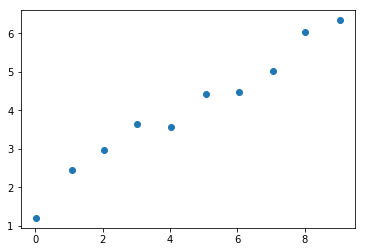

In [6]:
plt.plot(x, y, 'o')

### Resolvendo via mínimos quadrados

Queremos achar $m$ e $c$ tais que os pontos $(x_j,\tilde y_j)$ determinados pela reta $\tilde y = mx + c$ sejam uma "melhor" aproximação possível para os dados $(x_j,y_j)$. Interpretamos esse "melhor" como sendo no sentido de "mínimos quadrados". Para isso, precisamos resolver 
$$
\displaystyle \min_{\mathbf{u}\in \mathbb{R}^2} \|A\mathbf{u} - \mathbf{b}\|_2,
$$
onde
$$ A = \left[ \begin{matrix} x_1 & 1 \\ \vdots  & 1 \\ x_n & 1 \end{matrix}\right], \qquad \mathbf{u} = \left( \begin{matrix} m \\ c \end{matrix}\right), \qquad \mathbf{b} = \left( \begin{matrix} y_1 \\ \vdots \\ y_n \end{matrix} \right).
$$

In [7]:
A = np.vstack([x,np.ones(num_points)]).T
m1, c1 = np.linalg.lstsq(A, y, rcond=None)[0]
print(m1,c1)

0.5134139069317384 1.6883425319782923


### Visualização

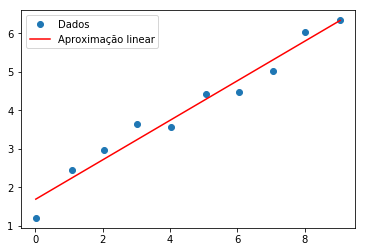

In [8]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='Dados')
plt.plot(x, m1*x + c1, 'r', label='Aproximação linear')
plt.legend()
plt.show()

## Propriedades termodinâmicas da água pura

Dados no arquivo `dados/retirados do livro "An Introduction to Fluid Dynamics" do G. Batchelor. 

In [9]:
from os import path
import csv
import numpy as np
import pandas as pd

arquivo = path.join('..', 'notebooks', 'dados', 'destino_jupyter', 'water_properties_from_Batchelor.csv')

agua1 = list(csv.reader(open(arquivo, "r"), delimiter=","))
agua2 = np.array(agua1[2:]).astype("float")
agua3 = np.loadtxt(open(arquivo, "rb"), delimiter=",", skiprows=2)
agua4 = pd.read_csv(arquivo, header=[0,1])

In [10]:
agua4.head()

,temp,density,viscosity
,Temperature (C),Density (g/cm^3),Viscosity (cm^2/s)
0,0,0.9999,0.01787
1,5,1.0000,1.51400
2,10,0.9997,1.30400
3,15,0.9991,1.13800
4,20,0.9982,1.00400


### Gráfico

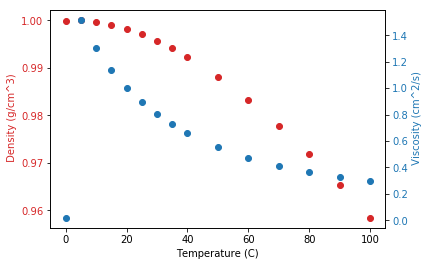

In [11]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel(agua1[1][0])
ax1.set_ylabel( agua1[1][1], color=color) 
ax1.plot(agua3[:,0], agua3[:,1], 'o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel(agua1[1][2], color=color)
ax2.plot(agua3[:,0], agua3[:,2], 'o', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

## Aproximação quadrática

Buscamos uma melhor aproximação para a densidade em função da temperatura.Talvez uma aproximação de segunda ordem $y = ax^2 + bx + c$. Como ela é linear nos coeficientes $(a,b,c)$, ainda é um problema de **regressão linear** e também pode ser facilmente resolvido via **método de mínimos quadrados**.


Precisamos minimizar o resíduo $\| A\mathbf{u} - \mathbf{y}\|$, onde 
$$ A = \left[ \begin{matrix} x_1^2 & x_1 & 1 \\ \vdots & \vdots  & 1 \\ x_n^2 & x_n & 1 \end{matrix}\right], \qquad \mathbf{u} = \left( \begin{matrix} a \\ b \\ c \end{matrix}\right), \qquad \mathbf{b} = \left( \begin{matrix} y_1 \\ \vdots \\ y_n \end{matrix} \right).
$$

In [12]:
x = agua3[:,0]
A = np.vstack([x**2, x,np.ones(len(x))]).T
print(A)

[[0.000e+00 0.000e+00 1.000e+00]
 [2.500e+01 5.000e+00 1.000e+00]
 [1.000e+02 1.000e+01 1.000e+00]
 [2.250e+02 1.500e+01 1.000e+00]
 [4.000e+02 2.000e+01 1.000e+00]
 [6.250e+02 2.500e+01 1.000e+00]
 [9.000e+02 3.000e+01 1.000e+00]
 [1.225e+03 3.500e+01 1.000e+00]
 [1.600e+03 4.000e+01 1.000e+00]
 [2.500e+03 5.000e+01 1.000e+00]
 [3.600e+03 6.000e+01 1.000e+00]
 [4.900e+03 7.000e+01 1.000e+00]
 [6.400e+03 8.000e+01 1.000e+00]
 [8.100e+03 9.000e+01 1.000e+00]
 [1.000e+04 1.000e+02 1.000e+00]]


### Solução

In [13]:
y = agua3[:,1]
a, b, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(a,b,c)

-3.6295100056677867e-06 -6.496768558464583e-05 1.0005991832098982


### Visualização

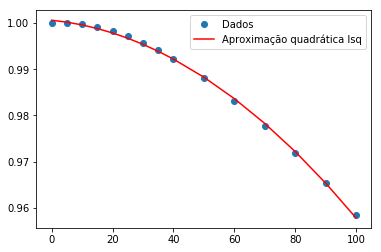

In [14]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='Dados')
plt.plot(x, a*x**2 + b*x + c, 'r', label='Aproximação quadrática lsq')
plt.legend()
plt.show()

In [15]:
len(x)

15

15 parâmetros aproximados por apenas 3!

In [16]:
print(np.linalg.lstsq(A, y, rcond=None)[1][0])

1.991209554160445e-06


### Comparando com aproximação linear

In [17]:
A1 = np.vstack([x,np.ones(len(x))]).T
m, d = np.linalg.lstsq(A1, y, rcond=None)[0]
print(m,d)

-0.00041965346534652876 1.0056721122112207


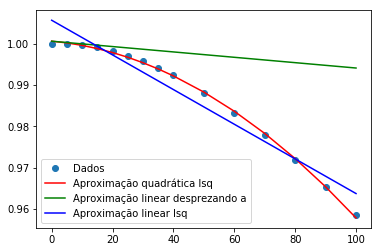

In [18]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='Dados')
plt.plot(x, a*x**2 + b*x + c, 'r', label='Aproximação quadrática lsq')
plt.plot(x, b*x + c, 'g', label='Aproximação linear desprezando a')
plt.plot(x, m*x + d, 'b', label='Aproximação linear lsq')
plt.legend()
plt.show()

## Erros quadráticos - resíduos

O **erro quadrático** é o valor de $\|A\mathbf{x} - \mathbf{y}\|_2^2$ para a melhor aproximação encontrada, que é a soma do quadrado dos resíduos. O **resíduo** é o erro 
$$ r_j = (A\mathbf{x})_j - y_j
$$
de cada medição.

Vamos comparar os erros quadráticos de cada aproximação:

In [21]:
print('Erro quadrático da aproximação linear:', np.linalg.lstsq(A1, y, rcond=None)[1][0])
print('Erro quadrático aproximação de segunda ordem:', np.linalg.lstsq(A, y, rcond=None)[1][0])

Erro quadrático da aproximação linear: 0.0001383156353135267
Erro quadrático aproximação de segunda ordem: 1.991209554160445e-06


## Exercícios:

1. Calcule uma aproximação polinomial de **terceira** ordem para a **densidade** e verifique o erro residual.
1. Ache uma "boa" aproximação polinomial para os dados da **viscosidade** da água pura, para temperaturas entre 5 e 100C.

## Apresentação em slides:

Para visualizar na forma de slides, abrir um "terminal" bash e usar a linha de comando
```bash
jupyter nbconvert 01.00-Aula1.ipynb --to slides --post serve
```

Isso abrirá uma aba no seu navegador com o endereço
```
http://127.0.0.1:8000/01.00-Aula1.slides.html#/
```

Para salvar a apresentação em pdf, não funciona "imprimir" essa página, pois ela só imprimirá slides individuais da apresentação.

Para salvar em pdf a apresentação completa, uma opção é alterar o final do endereço acima, incluindo `/print-pdf` antes do final `#/`, ficando o endereço da forma
```
http://127.0.0.1:8000/01.00-Aula1.slides.html?print-pdf#/
```